<div style="background-color: #424449; padding: 30px; text-align: center; font-size: 36px; font-weight: bold;">
  <span style="color: #caccd1;">4. Interpretação dos Clusters</span>
</div>

In [1]:
%%capture
%run 3.Modelagem.ipynb

In [2]:
# Anexar o resultado final dos clusters ao Dataframe original
df['cluster'] = labels2

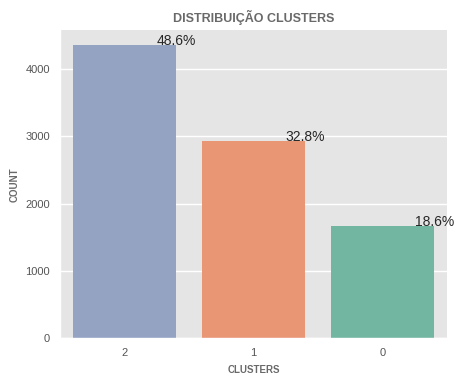

In [3]:
# Plot

plt.figure(figsize=(5,4))

plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8

total = float(df.shape[0])
cores=['#8da0cb', '#fc8d62', '#66c2a5']
sns.set_palette(sns.color_palette(cores))
ax = sns.countplot(x='cluster', data=df, order = df['cluster'].value_counts().index)
sns.despine()
plt.title('DISTRIBUIÇÃO CLUSTERS', fontsize = 9, color ='dimgrey', fontweight = 'bold')
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.xlabel('CLUSTERS', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 7)
plt.ylabel('COUNT', color = 'dimgrey', fontweight = 'bold', fontsize = 7)
plt.show();

Para uma interpretação mais significativa vamos avaliar o resultado dos clusters em escala e distribuição originais.

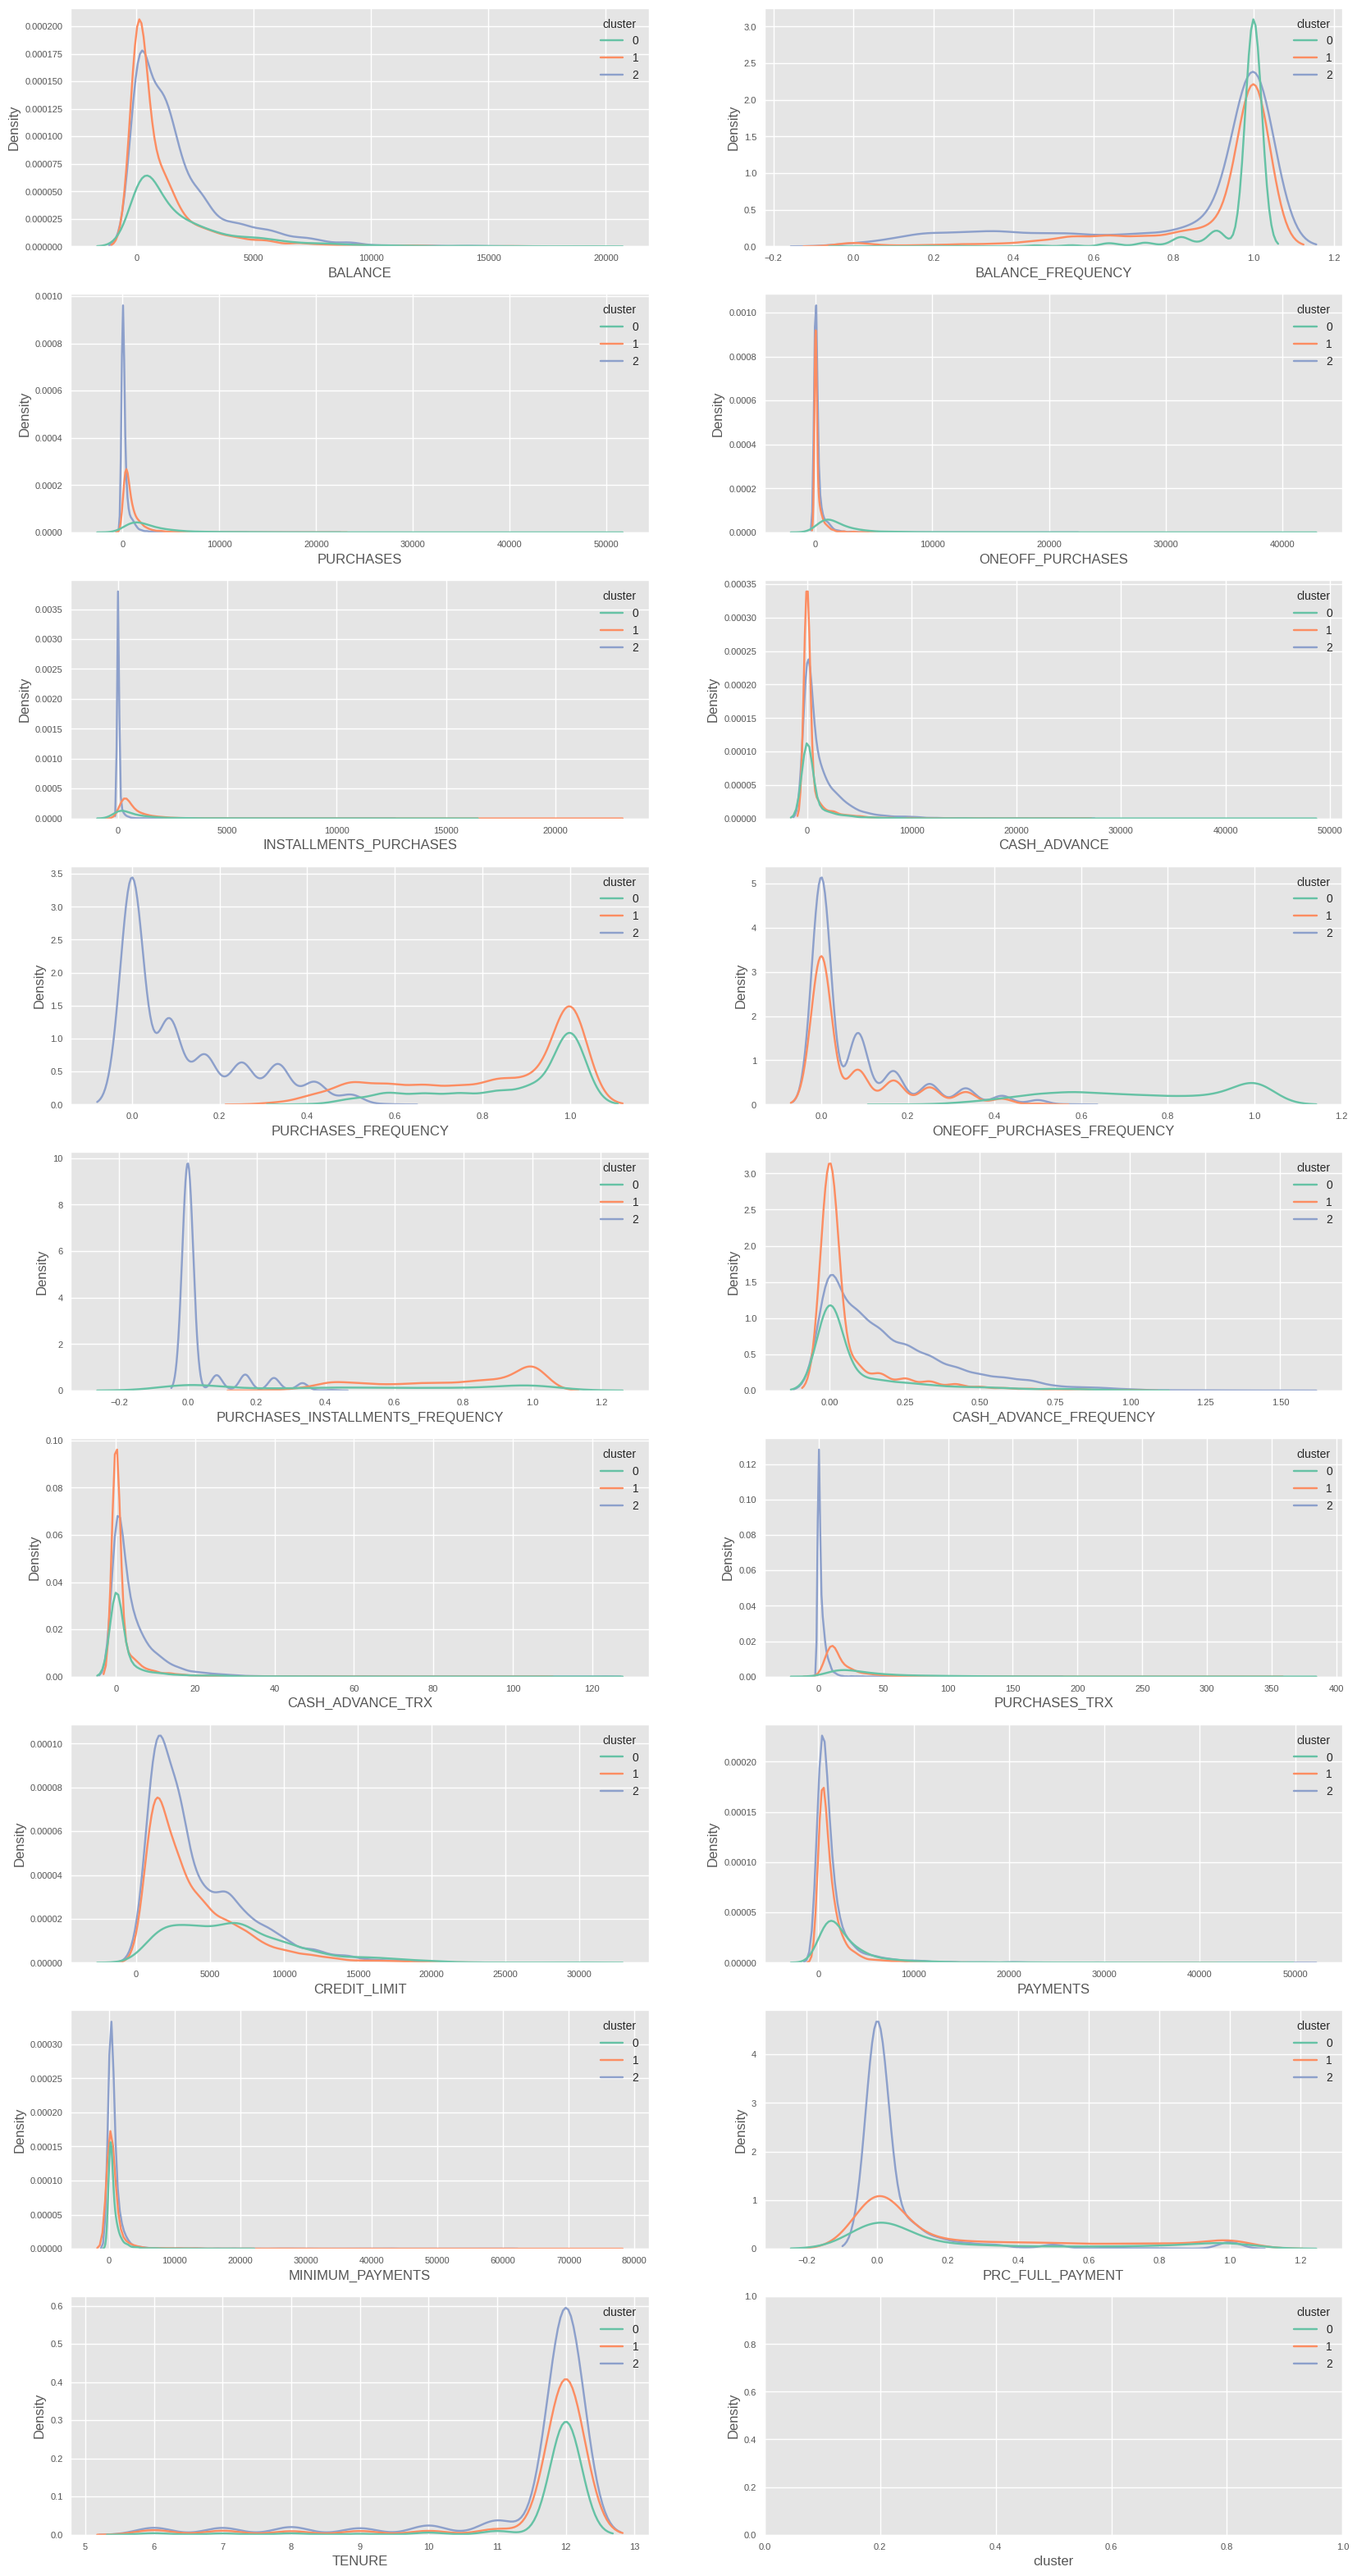

In [4]:
# Plotagem das colunas por clusters
plt.figure(figsize = (20,40))
x = 1
for d in df:
    plt.subplot(9, 2, x)
    sns.kdeplot(data=df, x=d, hue='cluster', palette='Set2')
    x += 1

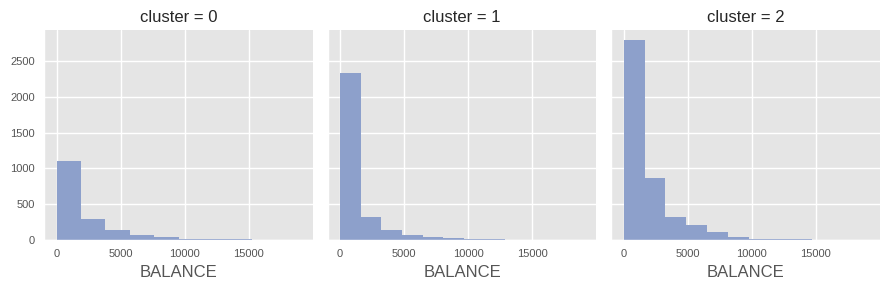

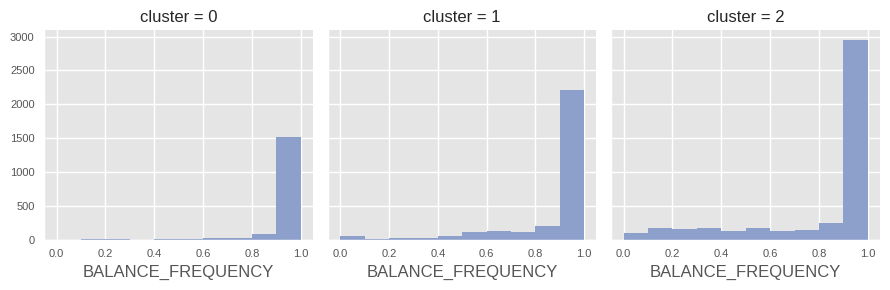

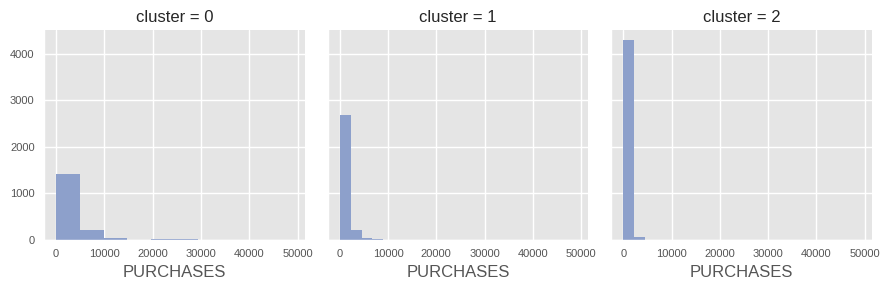

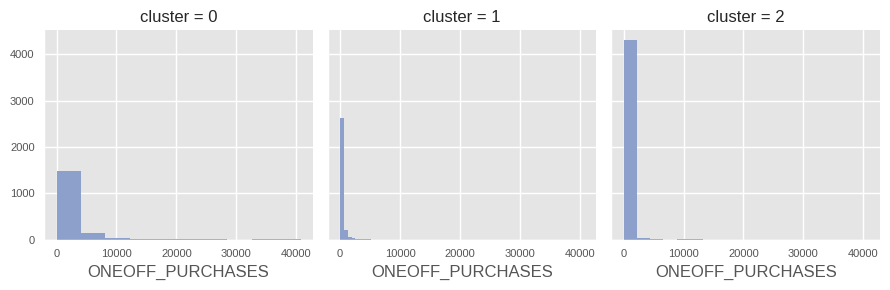

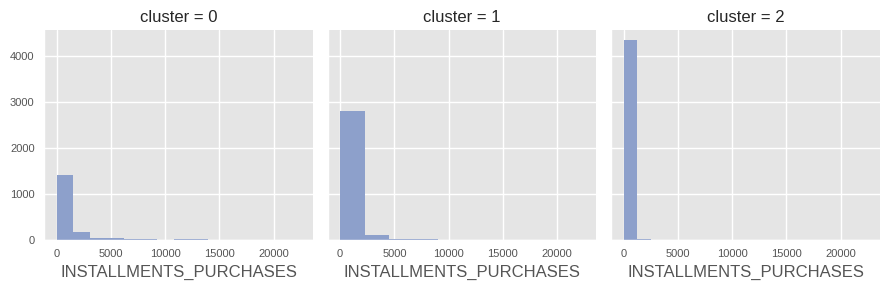

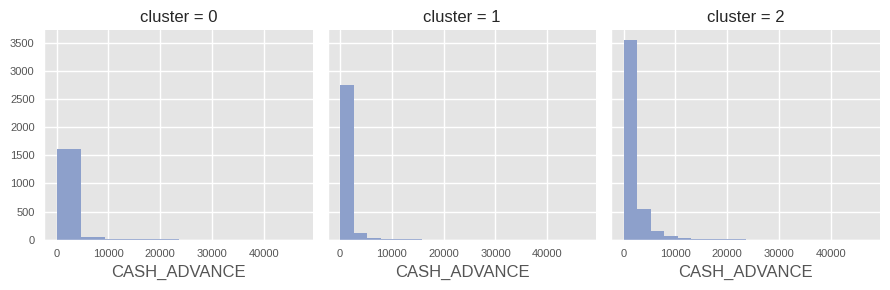

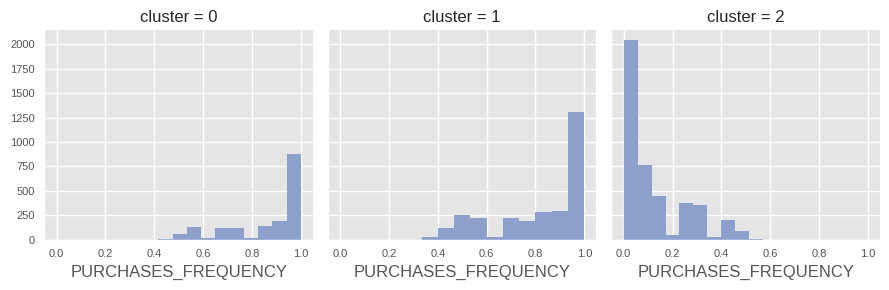

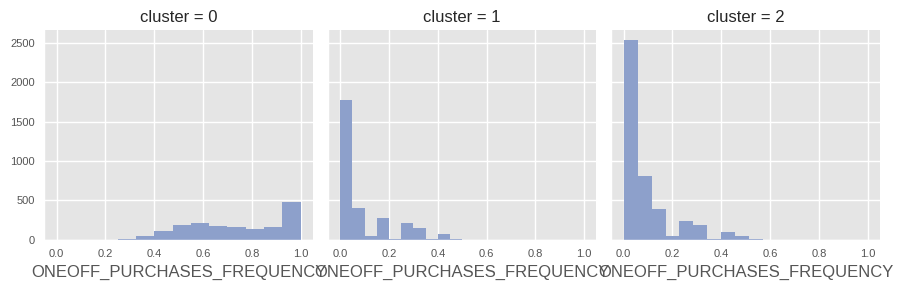

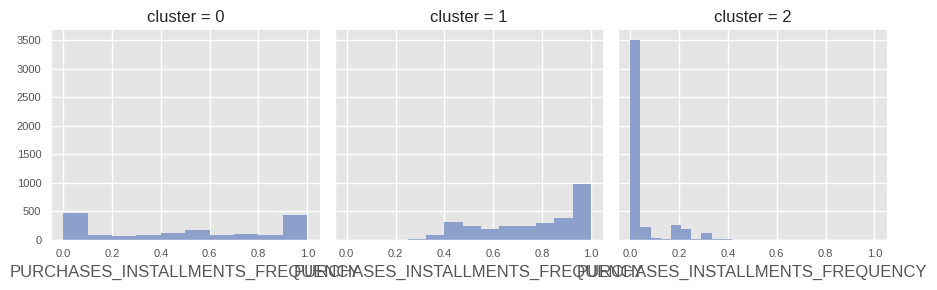

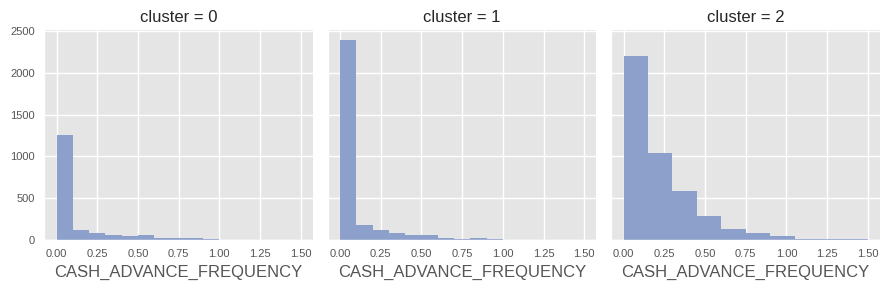

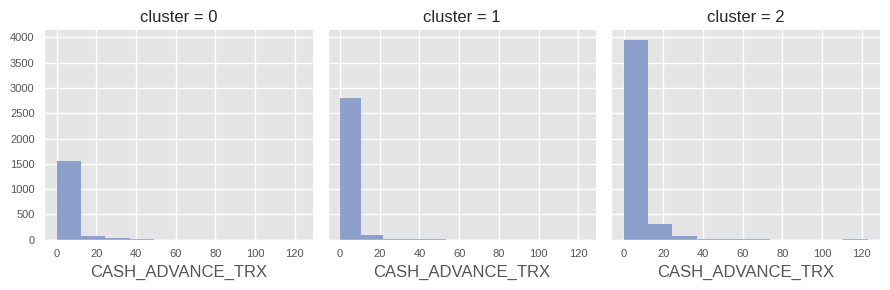

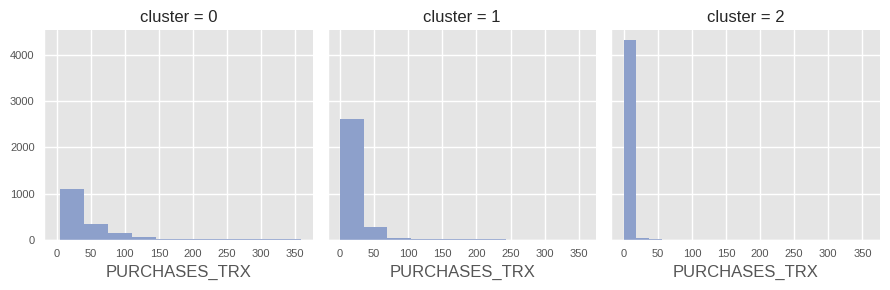

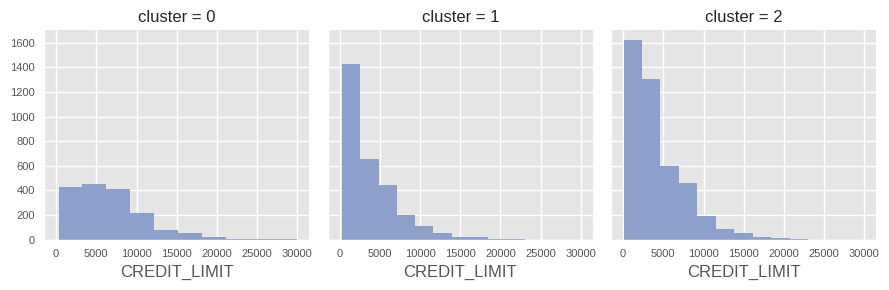

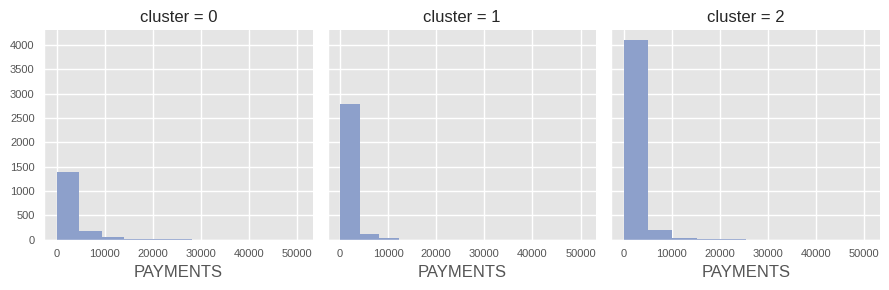

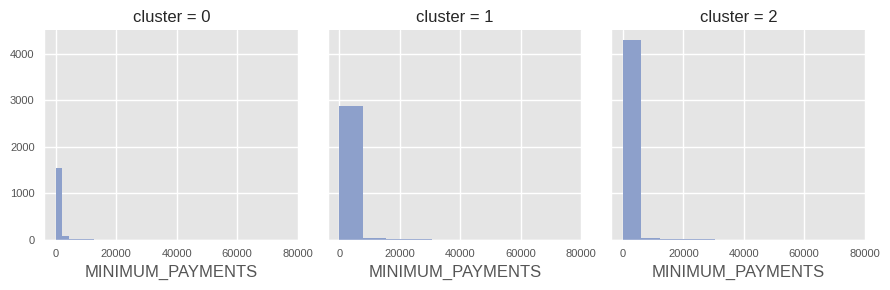

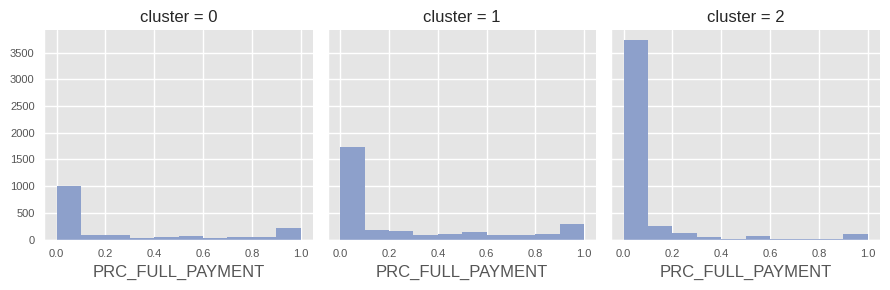

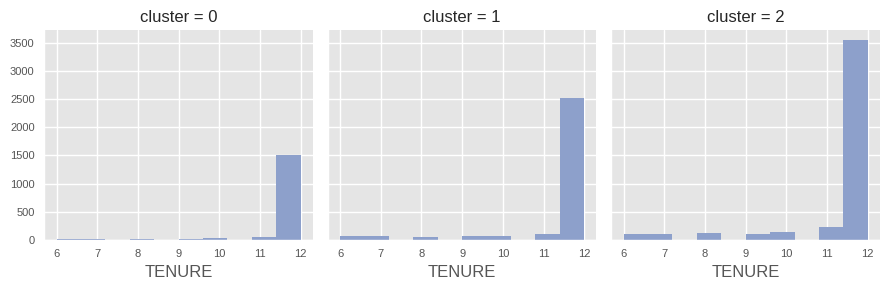

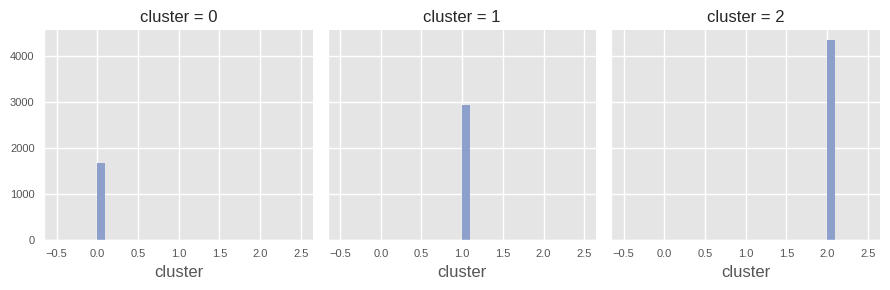

In [5]:
# Distribuição dos Clusters por colunas
for c in df:
    grid= sns.FacetGrid(df, col='cluster')
    grid.map(plt.hist, c)

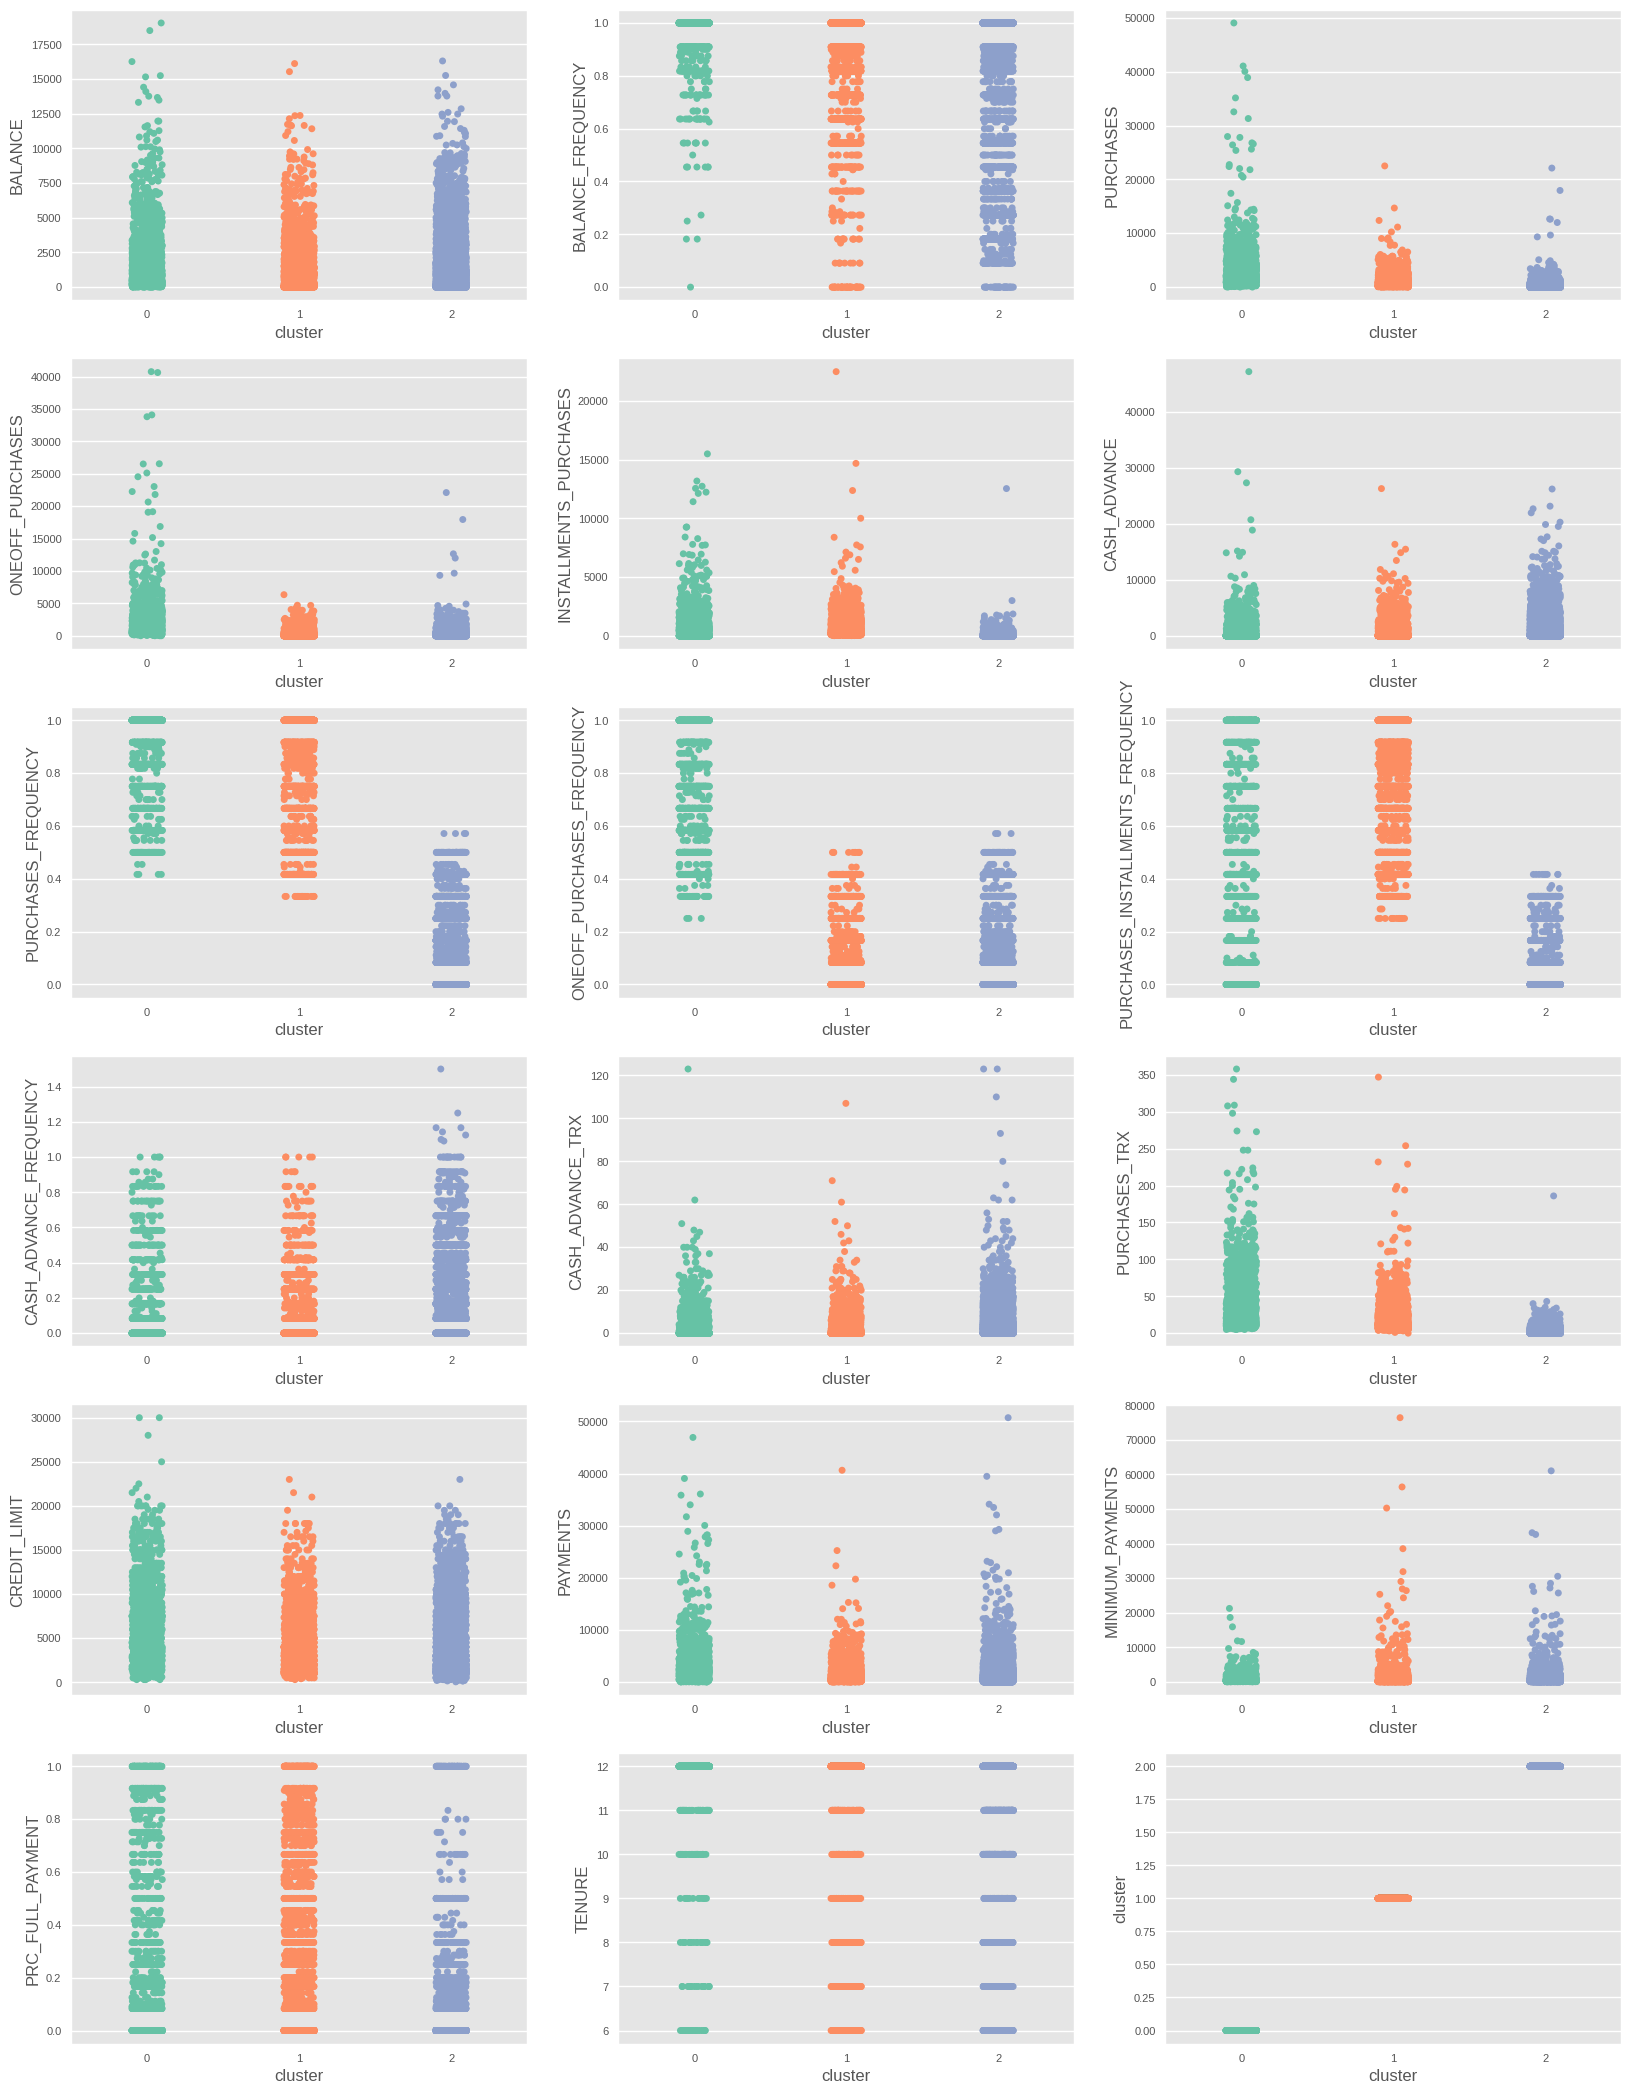

In [6]:
# Plotagem dos clusters por colunas 
plt.figure(figsize = (20,40))
x = 1
for d in df:
    plt.subplot(9, 3, x)
    sns.stripplot(data=df, x ='cluster', y=d, palette='Set2')
    x += 1

**SALDO**

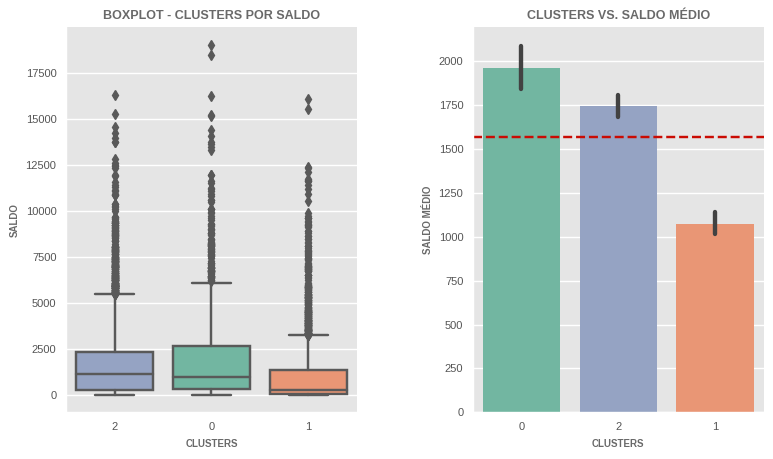

In [7]:
# Plot

plt.figure(figsize=(9,5))

plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8

plt.subplot(1, 2, 1)
cores = ['#8da0cb', '#66c2a5', '#fc8d62']
sns.set_palette(sns.color_palette(cores))
sns.boxplot(data=df, x='cluster', y='BALANCE', order = df.groupby(['cluster'])['BALANCE'].median().sort_values(ascending=False).index)
sns.despine()
plt.title('BOXPLOT - CLUSTERS POR SALDO', fontsize = 9, color ='dimgrey', fontweight = 'bold')
plt.xlabel('CLUSTERS', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 7)
plt.ylabel('SALDO', color = 'dimgrey', fontweight = 'bold', fontsize = 7)

plt.subplot(1, 2, 2)
cores = ['#66c2a5', '#8da0cb', '#fc8d62']
sns.set_palette(sns.color_palette(cores))
media = np.mean(df['BALANCE'])
ax = sns.barplot(x = 'cluster', y = 'BALANCE', data=df, order = df.groupby(['cluster'])['BALANCE'].mean().sort_values(ascending=False).index)
sns.despine()
ax.axhline(media, color='r', linestyle='--')
plt.title('CLUSTERS VS. SALDO MÉDIO', fontsize = 9, color ='dimgrey', fontweight = 'bold')
plt.xlabel('CLUSTERS', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 7)
plt.ylabel('SALDO MÉDIO', color = 'dimgrey', fontweight = 'bold', fontsize = 7)

plt.subplots_adjust(wspace=0.4)
plt.show();

Cliente 0: Maior saldo

Cliente 1: Menor saldo

Cliente 2: Saldo acima da média

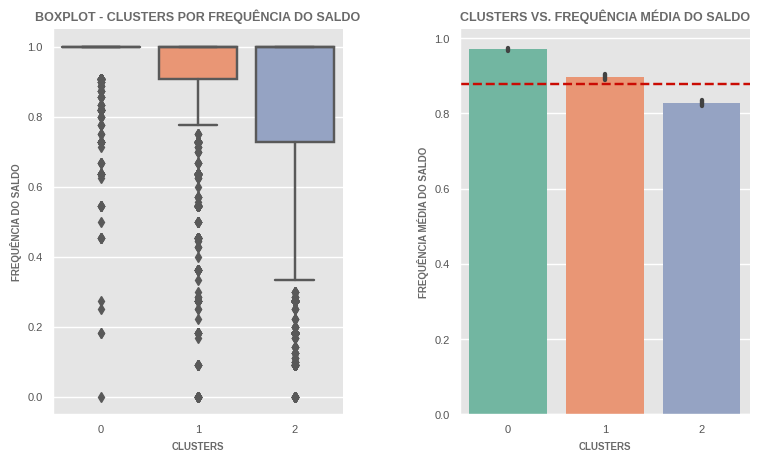

In [8]:
# Plot

plt.figure(figsize=(9,5))

plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8

plt.subplot(1, 2, 1)
cores = ['#fc8d62', '#66c2a5']
sns.set_palette(sns.color_palette(cores))
sns.boxplot(data=df, x='cluster', y='BALANCE_FREQUENCY', palette = 'Set2', order = df.groupby(['cluster'])['BALANCE_FREQUENCY'].median().sort_values(ascending=False).index)
sns.despine()
plt.title('BOXPLOT - CLUSTERS POR FREQUÊNCIA DO SALDO', fontsize = 9, color ='dimgrey', fontweight = 'bold')
plt.xlabel('CLUSTERS', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 7)
plt.ylabel('FREQUÊNCIA DO SALDO', color = 'dimgrey', fontweight = 'bold', fontsize = 7)

plt.subplot(1, 2, 2)
media = np.mean(df['BALANCE_FREQUENCY'])
ax = sns.barplot(x = 'cluster', y = 'BALANCE_FREQUENCY', data=df, palette = 'Set2', order = df.groupby(['cluster'])['BALANCE_FREQUENCY'].mean().sort_values(ascending=False).index)
sns.despine()
ax.axhline(media, color='r', linestyle='--')
plt.title('CLUSTERS VS. FREQUÊNCIA MÉDIA DO SALDO', fontsize = 9, color ='dimgrey', fontweight = 'bold')
plt.xlabel('CLUSTERS', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 7)
plt.ylabel('FREQUÊNCIA MÉDIA DO SALDO', color = 'dimgrey', fontweight = 'bold', fontsize = 7)

plt.subplots_adjust(wspace=0.4)
plt.show();

Cliente 0: Saldo atualizado com maior frequência

Cliente 1: Saldo atualizado com frequência um pouco acima da média

Cliente 2: Saldo atualizado com frequência abaixo da média

**COMPRAS**

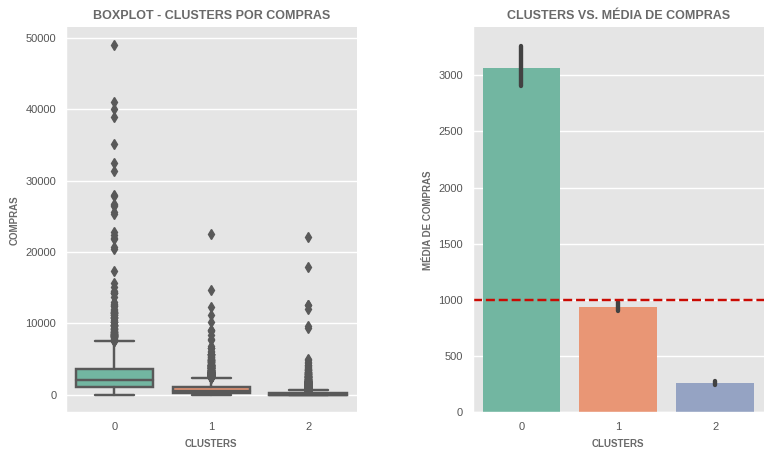

In [9]:
# Plot

plt.figure(figsize=(9,5))

plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8

plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='cluster', y='PURCHASES', palette = 'Set2', order = df.groupby(['cluster'])['PURCHASES'].median().sort_values(ascending=False).index)
sns.despine()
plt.title('BOXPLOT - CLUSTERS POR COMPRAS', fontsize = 9, color ='dimgrey', fontweight = 'bold')
plt.xlabel('CLUSTERS', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 7)
plt.ylabel('COMPRAS', color = 'dimgrey', fontweight = 'bold', fontsize = 7)

plt.subplot(1, 2, 2)
media = np.mean(df['PURCHASES'])
ax = sns.barplot(x = 'cluster', y = 'PURCHASES', data=df, palette = 'Set2', order = df.groupby(['cluster'])['PURCHASES'].mean().sort_values(ascending=False).index)
sns.despine()
ax.axhline(media, color='r', linestyle='--')
plt.title('CLUSTERS VS. MÉDIA DE COMPRAS', fontsize = 9, color ='dimgrey', fontweight = 'bold')
plt.xlabel('CLUSTERS', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 7)
plt.ylabel('MÉDIA DE COMPRAS', color = 'dimgrey', fontweight = 'bold', fontsize = 7)

plt.subplots_adjust(wspace=0.4)
plt.show();

Cliente 0: Valor de compras muito acima dos outros

Cliente 1: Valor de compras abaixo da média

Cliente 2: Valor de compras muito baixo

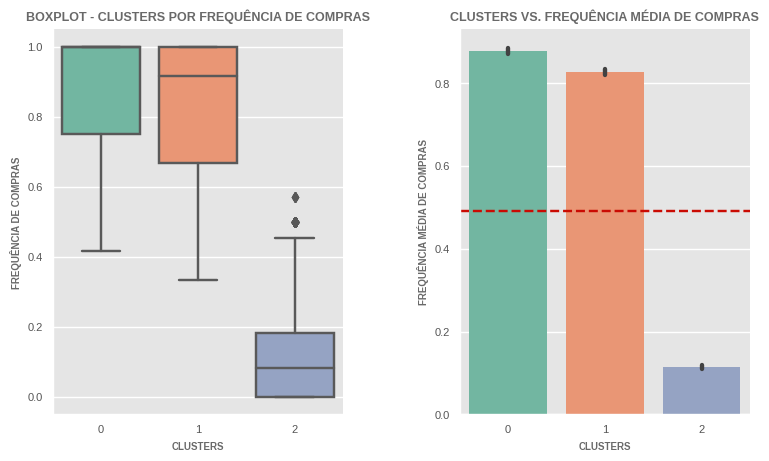

In [10]:
# Plot

plt.figure(figsize=(9,5))

plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8

plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='cluster', y='PURCHASES_FREQUENCY', palette = 'Set2', order = df.groupby(['cluster'])['PURCHASES_FREQUENCY'].median().sort_values(ascending=False).index)
sns.despine()
plt.title('BOXPLOT - CLUSTERS POR FREQUÊNCIA DE COMPRAS', fontsize = 9, color ='dimgrey', fontweight = 'bold')
plt.xlabel('CLUSTERS', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 7)
plt.ylabel('FREQUÊNCIA DE COMPRAS', color = 'dimgrey', fontweight = 'bold', fontsize = 7)

plt.subplot(1, 2, 2)
media = np.mean(df['PURCHASES_FREQUENCY'])
ax = sns.barplot(x = 'cluster', y = 'PURCHASES_FREQUENCY', data=df, palette = 'Set2', order = df.groupby(['cluster'])['PURCHASES_FREQUENCY'].mean().sort_values(ascending=False).index)
sns.despine()
ax.axhline(media, color='r', linestyle='--')
plt.title('CLUSTERS VS. FREQUÊNCIA MÉDIA DE COMPRAS', fontsize = 9, color ='dimgrey', fontweight = 'bold')
plt.xlabel('CLUSTERS', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 7)
plt.ylabel('FREQUÊNCIA MÉDIA DE COMPRAS', color = 'dimgrey', fontweight = 'bold', fontsize = 7)

plt.subplots_adjust(wspace=0.4)
plt.show();

Cliente 0: Alta frequência de compras

Cliente 1: Alta frequência de compras

Cliente 2: Baixa frequência de compras

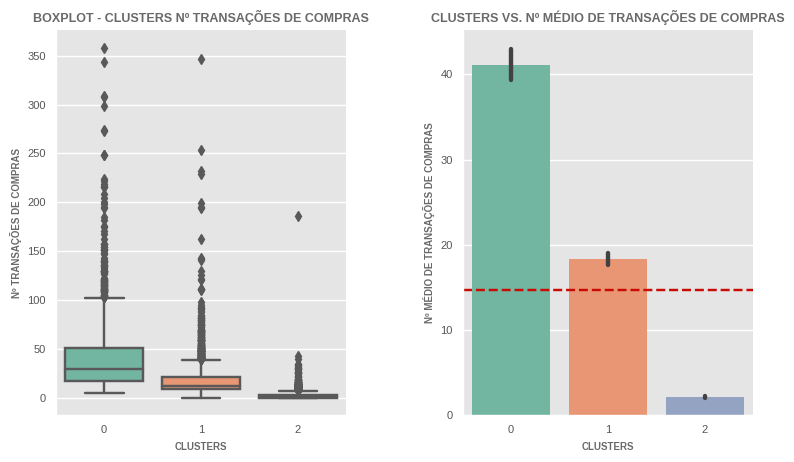

In [11]:
# Plot

plt.figure(figsize=(9,5))

plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8

plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='cluster', y='PURCHASES_TRX', palette = 'Set2', order = df.groupby(['cluster'])['PURCHASES_TRX'].median().sort_values(ascending=False).index)
sns.despine()
plt.title('BOXPLOT - CLUSTERS Nº TRANSAÇÕES DE COMPRAS', fontsize = 9, color ='dimgrey', fontweight = 'bold')
plt.xlabel('CLUSTERS', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 7)
plt.ylabel('Nº TRANSAÇÕES DE COMPRAS', color = 'dimgrey', fontweight = 'bold', fontsize = 7)

plt.subplot(1, 2, 2)
media = np.mean(df['PURCHASES_TRX'])
ax = sns.barplot(x = 'cluster', y = 'PURCHASES_TRX', data=df, palette = 'Set2', order = df.groupby(['cluster'])['PURCHASES_TRX'].mean().sort_values(ascending=False).index)
sns.despine()
ax.axhline(media, color='r', linestyle='--')
plt.title('CLUSTERS VS. Nº MÉDIO DE TRANSAÇÕES DE COMPRAS', fontsize = 9, color ='dimgrey', fontweight = 'bold')
plt.xlabel('CLUSTERS', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 7)
plt.ylabel('Nº MÉDIO DE TRANSAÇÕES DE COMPRAS', color = 'dimgrey', fontweight = 'bold', fontsize = 7)

plt.subplots_adjust(wspace=0.4)
plt.show();

Cliente 0: Maior número de transações de compra feitas

Cliente 1: Número de transações de compras feitas acima da média

Cliente 2: Menor número de transações de compra feitas

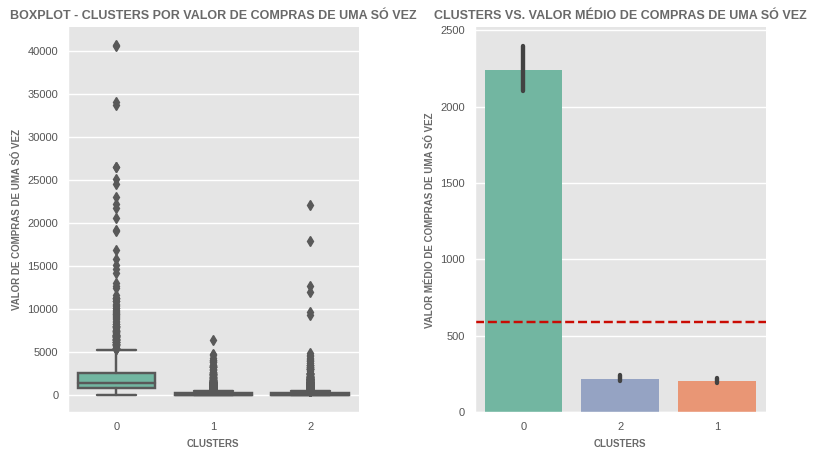

In [12]:
# Plot

plt.figure(figsize=(9,5))

plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8

plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='cluster', y='ONEOFF_PURCHASES', palette = 'Set2', order = df.groupby(['cluster'])['ONEOFF_PURCHASES'].median().sort_values(ascending=False).index)
sns.despine()
plt.title('BOXPLOT - CLUSTERS POR VALOR DE COMPRAS DE UMA SÓ VEZ', fontsize = 9, color ='dimgrey', fontweight = 'bold')
plt.xlabel('CLUSTERS', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 7)
plt.ylabel('VALOR DE COMPRAS DE UMA SÓ VEZ', color = 'dimgrey', fontweight = 'bold', fontsize = 7)

plt.subplot(1, 2, 2)
cores = ['#66c2a5', '#8da0cb', '#fc8d62']
sns.set_palette(sns.color_palette(cores))
media = np.mean(df['ONEOFF_PURCHASES'])
ax = sns.barplot(x = 'cluster', y = 'ONEOFF_PURCHASES', data=df, order = df.groupby(['cluster'])['ONEOFF_PURCHASES'].mean().sort_values(ascending=False).index)
sns.despine()
ax.axhline(media, color='r', linestyle='--')
plt.title('CLUSTERS VS. VALOR MÉDIO DE COMPRAS DE UMA SÓ VEZ', fontsize = 9, color ='dimgrey', fontweight = 'bold')
plt.xlabel('CLUSTERS', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 7)
plt.ylabel('VALOR MÉDIO DE COMPRAS DE UMA SÓ VEZ', color = 'dimgrey', fontweight = 'bold', fontsize = 7)

plt.subplots_adjust(wspace=0.4)
plt.show();

Cliente 0: Valor de compras feitas de uma só vez muito acima dos demais

Cliente 1: Valor de compras feitas de uma só vez muito baixo

CLiente 2: Valor de compras feitas de uma só vez muito baixo

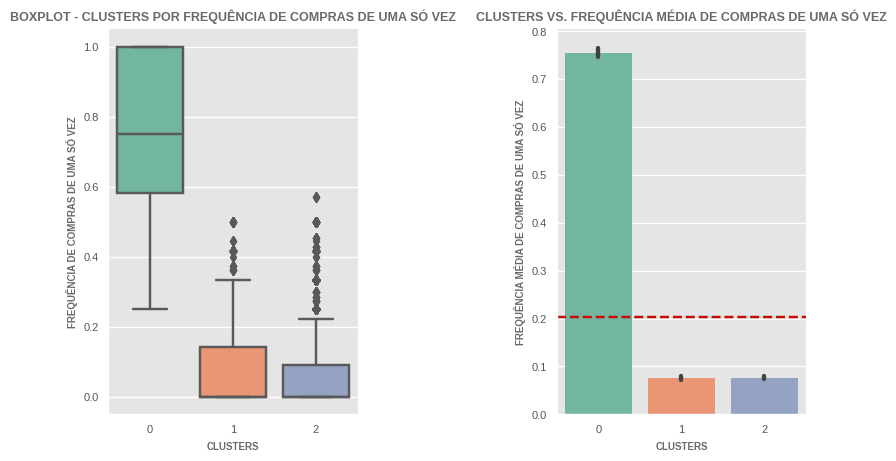

In [13]:
# Plot

plt.figure(figsize=(9,5))

plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8

plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='cluster', y='ONEOFF_PURCHASES_FREQUENCY', palette = 'Set2', order = df.groupby(['cluster'])['ONEOFF_PURCHASES_FREQUENCY'].median().sort_values(ascending=False).index)
sns.despine()
plt.title('BOXPLOT - CLUSTERS POR FREQUÊNCIA DE COMPRAS DE UMA SÓ VEZ', fontsize = 9, color ='dimgrey', fontweight = 'bold')
plt.xlabel('CLUSTERS', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 7)
plt.ylabel('FREQUÊNCIA DE COMPRAS DE UMA SÓ VEZ', color = 'dimgrey', fontweight = 'bold', fontsize = 7)

plt.subplot(1, 2, 2)
media = np.mean(df['ONEOFF_PURCHASES_FREQUENCY'])
ax = sns.barplot(x = 'cluster', y = 'ONEOFF_PURCHASES_FREQUENCY', data=df, palette = 'Set2', order = df.groupby(['cluster'])['ONEOFF_PURCHASES_FREQUENCY'].mean().sort_values(ascending=False).index)
sns.despine()
ax.axhline(media, color='r', linestyle='--')
plt.title('CLUSTERS VS. FREQUÊNCIA MÉDIA DE COMPRAS DE UMA SÓ VEZ', fontsize = 9, color ='dimgrey', fontweight = 'bold')
plt.xlabel('CLUSTERS', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 7)
plt.ylabel('FREQUÊNCIA MÉDIA DE COMPRAS DE UMA SÓ VEZ', color = 'dimgrey', fontweight = 'bold', fontsize = 7)

plt.subplots_adjust(wspace=0.8)
plt.show();

Cliente 0: Frequência de compras feitas de uma só vez muito acima dos demais

Cliente 1: Frequência de compras feitas de uma só vez muito baixa

Cliente 2: Frequência de compras feitas de uma só vez muito baixa

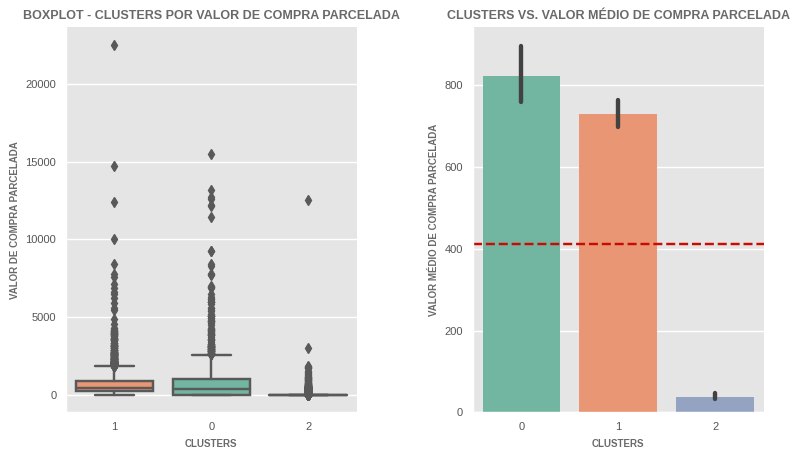

In [14]:
# Plot

plt.figure(figsize=(9,5))

plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8

plt.subplot(1, 2, 1)
cores = ['#fc8d62', '#66c2a5', '#8da0cb']
sns.set_palette(sns.color_palette(cores))
sns.boxplot(data=df, x='cluster', y='INSTALLMENTS_PURCHASES', order = df.groupby(['cluster'])['INSTALLMENTS_PURCHASES'].median().sort_values(ascending=False).index)
sns.despine()
plt.title('BOXPLOT - CLUSTERS POR VALOR DE COMPRA PARCELADA', fontsize = 9, color ='dimgrey', fontweight = 'bold')
plt.xlabel('CLUSTERS', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 7)
plt.ylabel('VALOR DE COMPRA PARCELADA', color = 'dimgrey', fontweight = 'bold', fontsize = 7)

plt.subplot(1, 2, 2)
media = np.mean(df['INSTALLMENTS_PURCHASES'])
ax = sns.barplot(x = 'cluster', y = 'INSTALLMENTS_PURCHASES', data=df, palette = 'Set2', order = df.groupby(['cluster'])['INSTALLMENTS_PURCHASES'].mean().sort_values(ascending=False).index)
sns.despine()
ax.axhline(media, color='r', linestyle='--')
plt.title('CLUSTERS VS. VALOR MÉDIO DE COMPRA PARCELADA', fontsize = 9, color ='dimgrey', fontweight = 'bold')
plt.xlabel('CLUSTERS', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 7)
plt.ylabel('VALOR MÉDIO DE COMPRA PARCELADA', color = 'dimgrey', fontweight = 'bold', fontsize = 7)

plt.subplots_adjust(wspace=0.4)
plt.show();

Cliente 0: Maior valor de compras parceladas

Cliente 1: Alto valor de compras parceladas

Cliente 2: Baixo valor de compras parceladas

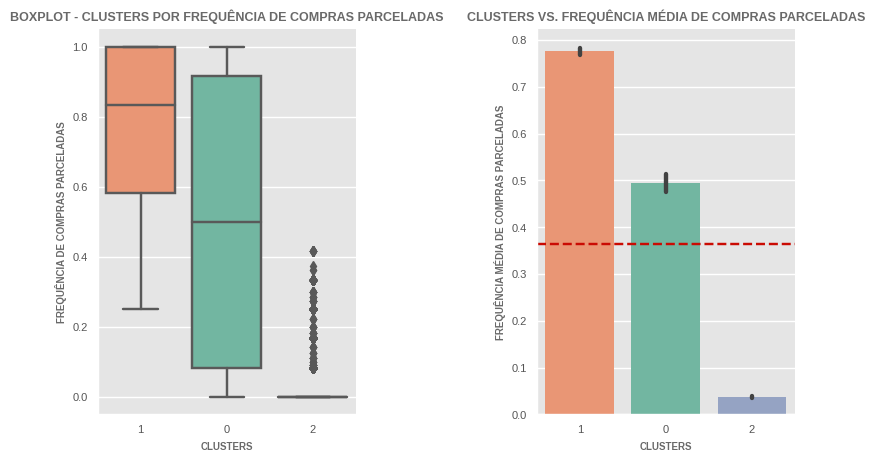

In [15]:
# Plot

plt.figure(figsize=(9,5))

plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8

plt.subplot(1, 2, 1)
cores = ['#fc8d62', '#66c2a5', '#8da0cb']
sns.set_palette(sns.color_palette(cores))
sns.boxplot(data=df, x='cluster', y='PURCHASES_INSTALLMENTS_FREQUENCY', order = df.groupby(['cluster'])['PURCHASES_INSTALLMENTS_FREQUENCY'].median().sort_values(ascending=False).index)
sns.despine()
plt.title('BOXPLOT - CLUSTERS POR FREQUÊNCIA DE COMPRAS PARCELADAS', fontsize = 9, color ='dimgrey', fontweight = 'bold')
plt.xlabel('CLUSTERS', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 7)
plt.ylabel('FREQUÊNCIA DE COMPRAS PARCELADAS', color = 'dimgrey', fontweight = 'bold', fontsize = 7)

plt.subplot(1, 2, 2)
cores = ['#fc8d62', '#66c2a5', '#8da0cb']
sns.set_palette(sns.color_palette(cores))
media = np.mean(df['PURCHASES_INSTALLMENTS_FREQUENCY'])
ax = sns.barplot(x = 'cluster', y = 'PURCHASES_INSTALLMENTS_FREQUENCY', data=df, order = df.groupby(['cluster'])['PURCHASES_INSTALLMENTS_FREQUENCY'].mean().sort_values(ascending=False).index)
sns.despine()
ax.axhline(media, color='r', linestyle='--')
plt.title('CLUSTERS VS. FREQUÊNCIA MÉDIA DE COMPRAS PARCELADAS', fontsize = 9, color ='dimgrey', fontweight = 'bold')
plt.xlabel('CLUSTERS', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 7)
plt.ylabel('FREQUÊNCIA MÉDIA DE COMPRAS PARCELADAS', color = 'dimgrey', fontweight = 'bold', fontsize = 7)

plt.subplots_adjust(wspace=0.7)
plt.show();

Cliente 0: Frequência de compras parceladas acima da média

Cliente 1: Maior frequência de compras parceladas

Cliente 2: Menor frequência de compras parceladas

**DINHEIRO ADIANTADO**

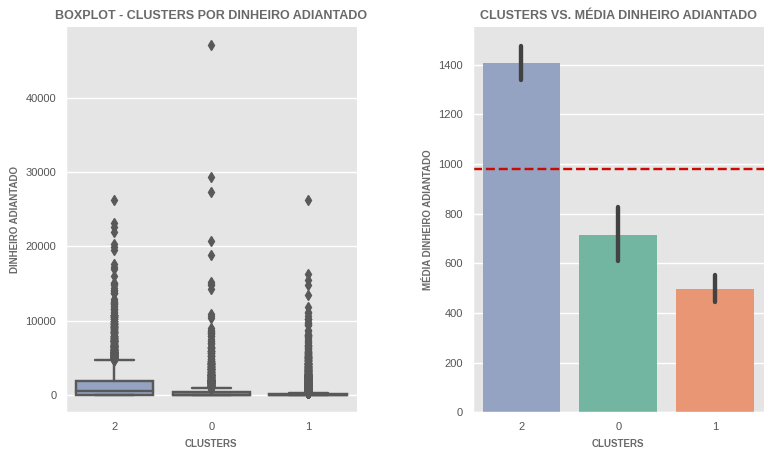

In [16]:
# Plot

plt.figure(figsize=(9,5))

plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8

plt.subplot(1, 2, 1)
cores = ['#8da0cb', '#66c2a5', '#fc8d62']
sns.set_palette(sns.color_palette(cores))
sns.boxplot(data=df, x='cluster', y='CASH_ADVANCE', order = df.groupby(['cluster'])['CASH_ADVANCE'].median().sort_values(ascending=False).index)
sns.despine()
plt.title('BOXPLOT - CLUSTERS POR DINHEIRO ADIANTADO', fontsize = 9, color ='dimgrey', fontweight = 'bold')
plt.xlabel('CLUSTERS', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 7)
plt.ylabel('DINHEIRO ADIANTADO', color = 'dimgrey', fontweight = 'bold', fontsize = 7)

plt.subplot(1, 2, 2)
cores = ['#8da0cb', '#66c2a5', '#fc8d62']
sns.set_palette(sns.color_palette(cores))
media = np.mean(df['CASH_ADVANCE'])
ax = sns.barplot(x = 'cluster', y = 'CASH_ADVANCE', data=df, order = df.groupby(['cluster'])['CASH_ADVANCE'].mean().sort_values(ascending=False).index)
sns.despine()
ax.axhline(media, color='r', linestyle='--')
plt.title('CLUSTERS VS. MÉDIA DINHEIRO ADIANTADO', fontsize = 9, color ='dimgrey', fontweight = 'bold')
plt.xlabel('CLUSTERS', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 7)
plt.ylabel('MÉDIA DINHEIRO ADIANTADO', color = 'dimgrey', fontweight = 'bold', fontsize = 7)

plt.subplots_adjust(wspace=0.4)
plt.show();

Cliente 0: Valor em dinheiro adiantado abaixo da média

Cliente 1: Valor em dinheiro adiantado abaixo da média

Cliente 2: Maior valor em dinheiro adiantado

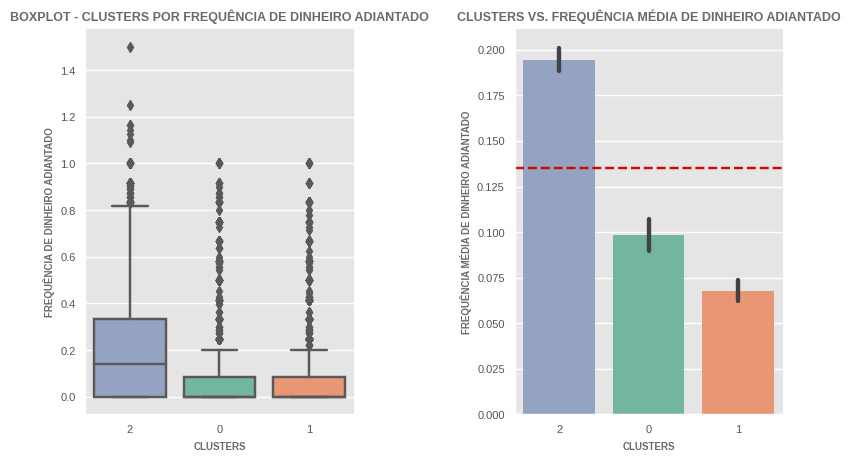

In [17]:
# Plot

plt.figure(figsize=(9,5))

plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8

plt.subplot(1, 2, 1)
cores = ['#8da0cb', '#66c2a5', '#fc8d62']
sns.set_palette(sns.color_palette(cores))
sns.boxplot(data=df, x='cluster', y='CASH_ADVANCE_FREQUENCY', order = df.groupby(['cluster'])['CASH_ADVANCE_FREQUENCY'].median().sort_values(ascending=False).index)
sns.despine()
plt.title('BOXPLOT - CLUSTERS POR FREQUÊNCIA DE DINHEIRO ADIANTADO', fontsize = 9, color ='dimgrey', fontweight = 'bold')
plt.xlabel('CLUSTERS', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 7)
plt.ylabel('FREQUÊNCIA DE DINHEIRO ADIANTADO', color = 'dimgrey', fontweight = 'bold', fontsize = 7)

plt.subplot(1, 2, 2)
cores = ['#8da0cb', '#66c2a5', '#fc8d62']
sns.set_palette(sns.color_palette(cores))
media = np.mean(df['CASH_ADVANCE_FREQUENCY'])
ax = sns.barplot(x = 'cluster', y = 'CASH_ADVANCE_FREQUENCY', data=df, order = df.groupby(['cluster'])['CASH_ADVANCE_FREQUENCY'].mean().sort_values(ascending=False).index)
sns.despine()
ax.axhline(media, color='r', linestyle='--')
plt.title('CLUSTERS VS. FREQUÊNCIA MÉDIA DE DINHEIRO ADIANTADO', fontsize = 9, color ='dimgrey', fontweight = 'bold')
plt.xlabel('CLUSTERS', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 7)
plt.ylabel('FREQUÊNCIA MÉDIA DE DINHEIRO ADIANTADO', color = 'dimgrey', fontweight = 'bold', fontsize = 7)

plt.subplots_adjust(wspace=0.6)
plt.show();

Cliente 0: Frequência de dinheiro adiantado abaixo da média

Cliente 1: Frequência de dinheiro adiantado abaixo da média

Cliente 2: Alta frequência de dinheiro adiantado

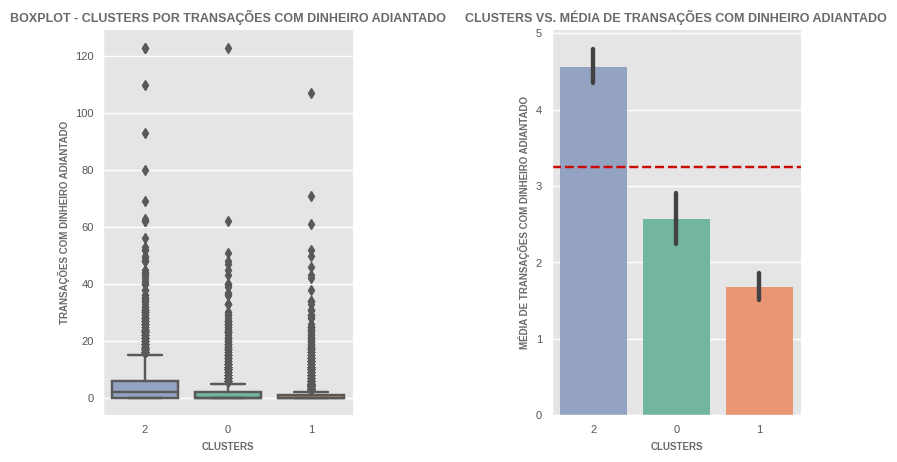

In [18]:
# Plot

plt.figure(figsize=(9,5))

plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8

plt.subplot(1, 2, 1)
cores = ['#8da0cb', '#66c2a5', '#fc8d62']
sns.set_palette(sns.color_palette(cores))
sns.boxplot(data=df, x='cluster', y='CASH_ADVANCE_TRX', order = df.groupby(['cluster'])['CASH_ADVANCE_TRX'].median().sort_values(ascending=False).index)
sns.despine()
plt.title('BOXPLOT - CLUSTERS POR TRANSAÇÕES COM DINHEIRO ADIANTADO', fontsize = 9, color ='dimgrey', fontweight = 'bold')
plt.xlabel('CLUSTERS', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 7)
plt.ylabel('TRANSAÇÕES COM DINHEIRO ADIANTADO', color = 'dimgrey', fontweight = 'bold', fontsize = 7)

plt.subplot(1, 2, 2)
cores = ['#8da0cb', '#66c2a5', '#fc8d62']
sns.set_palette(sns.color_palette(cores))
media = np.mean(df['CASH_ADVANCE_TRX'])
ax = sns.barplot(x = 'cluster', y = 'CASH_ADVANCE_TRX', data=df, order = df.groupby(['cluster'])['CASH_ADVANCE_TRX'].mean().sort_values(ascending=False).index)
sns.despine()
ax.axhline(media, color='r', linestyle='--')
plt.title('CLUSTERS VS. MÉDIA DE TRANSAÇÕES COM DINHEIRO ADIANTADO', fontsize = 9, color ='dimgrey', fontweight = 'bold')
plt.xlabel('CLUSTERS', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 7)
plt.ylabel('MÉDIA DE TRANSAÇÕES COM DINHEIRO ADIANTADO', color = 'dimgrey', fontweight = 'bold', fontsize = 7)

plt.subplots_adjust(wspace=0.8)
plt.show();

Cliente 0: Quantidade de transações realizadas com dinheiro antecipado abaixo da média

Cliente 1: Quantidade de transações realizadas com dinheiro antecipado abaixo da média

Cliente 2: Maior quantidade de transações realizadas com dinheiro antecipado

**LIMITE DE CRÉDITO**

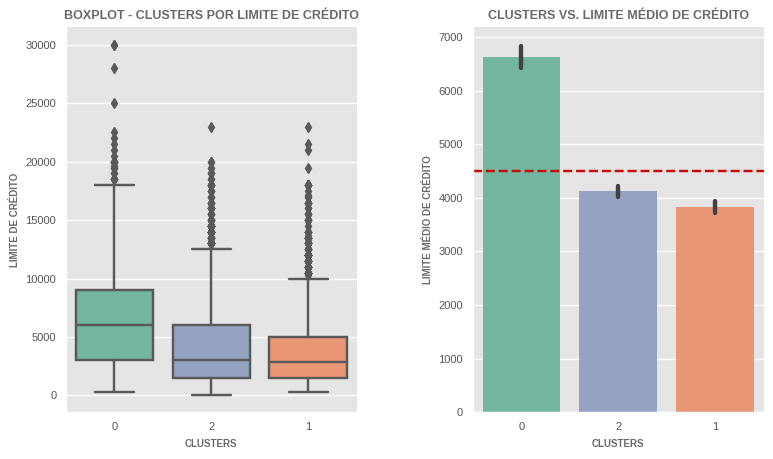

In [19]:
# Plot

plt.figure(figsize=(9,5))

plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8

plt.subplot(1, 2, 1)
cores = ['#66c2a5', '#8da0cb', '#fc8d62']
sns.set_palette(sns.color_palette(cores))
sns.boxplot(data=df, x='cluster', y='CREDIT_LIMIT', order = df.groupby(['cluster'])['CREDIT_LIMIT'].median().sort_values(ascending=False).index)
sns.despine()
plt.title('BOXPLOT - CLUSTERS POR LIMITE DE CRÉDITO', fontsize = 9, color ='dimgrey', fontweight = 'bold')
plt.xlabel('CLUSTERS', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 7)
plt.ylabel('LIMITE DE CRÉDITO', color = 'dimgrey', fontweight = 'bold', fontsize = 7)

plt.subplot(1, 2, 2)
cores = ['#66c2a5', '#8da0cb', '#fc8d62']
sns.set_palette(sns.color_palette(cores))
media = np.mean(df['CREDIT_LIMIT'])
ax = sns.barplot(x = 'cluster', y = 'CREDIT_LIMIT', data=df, order = df.groupby(['cluster'])['CREDIT_LIMIT'].mean().sort_values(ascending=False).index)
sns.despine()
ax.axhline(media, color='r', linestyle='--')
plt.title('CLUSTERS VS. LIMITE MÉDIO DE CRÉDITO', fontsize = 9, color ='dimgrey', fontweight = 'bold')
plt.xlabel('CLUSTERS', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 7)
plt.ylabel('LIMITE MÉDIO DE CRÉDITO', color = 'dimgrey', fontweight = 'bold', fontsize = 7)

plt.subplots_adjust(wspace=0.4)
plt.show();

Cliente 0: Maior limite de cartão de crédito

Cliente 1: Limite de cartão de crédito abaixo da média

Cliente 2: Limite de cartão de crédito abaixo da média

**PAGAMENTOS**

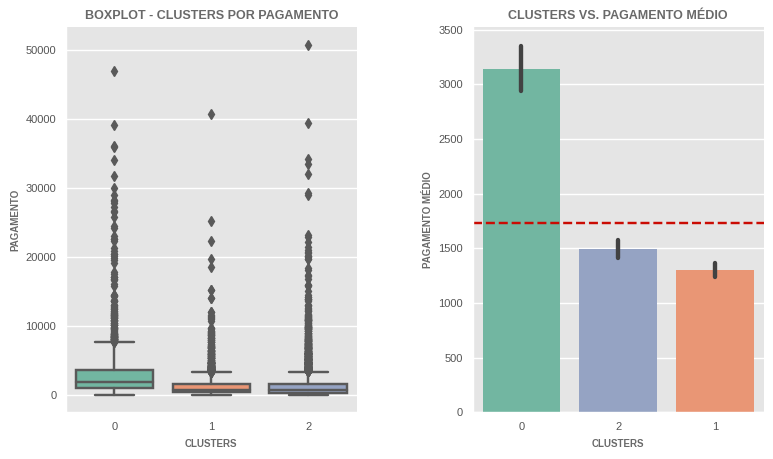

In [20]:
# Plot

plt.figure(figsize=(9,5))

plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8

plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='cluster', y='PAYMENTS', palette = 'Set2', order = df.groupby(['cluster'])['PAYMENTS'].median().sort_values(ascending=False).index)
sns.despine()
plt.title('BOXPLOT - CLUSTERS POR PAGAMENTO', fontsize = 9, color ='dimgrey', fontweight = 'bold')
plt.xlabel('CLUSTERS', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 7)
plt.ylabel('PAGAMENTO', color = 'dimgrey', fontweight = 'bold', fontsize = 7)

plt.subplot(1, 2, 2)
cores = ['#66c2a5', '#8da0cb', '#fc8d62']
sns.set_palette(sns.color_palette(cores))
media = np.mean(df['PAYMENTS'])
ax = sns.barplot(x = 'cluster', y = 'PAYMENTS', data=df, order = df.groupby(['cluster'])['PAYMENTS'].mean().sort_values(ascending=False).index)
sns.despine()
ax.axhline(media, color='r', linestyle='--')
plt.title('CLUSTERS VS. PAGAMENTO MÉDIO', fontsize = 9, color ='dimgrey', fontweight = 'bold')
plt.xlabel('CLUSTERS', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 7)
plt.ylabel('PAGAMENTO MÉDIO', color = 'dimgrey', fontweight = 'bold', fontsize = 7)

plt.subplots_adjust(wspace=0.4)
plt.show();

Cliente 0: Maior valor do pagamento feito pelo usuário

Cliente 1: Valor do pagamento feito pelo usuário abaixo da média

Cliente 2: Valor do pagamento feito pelo usuário abaixo da média

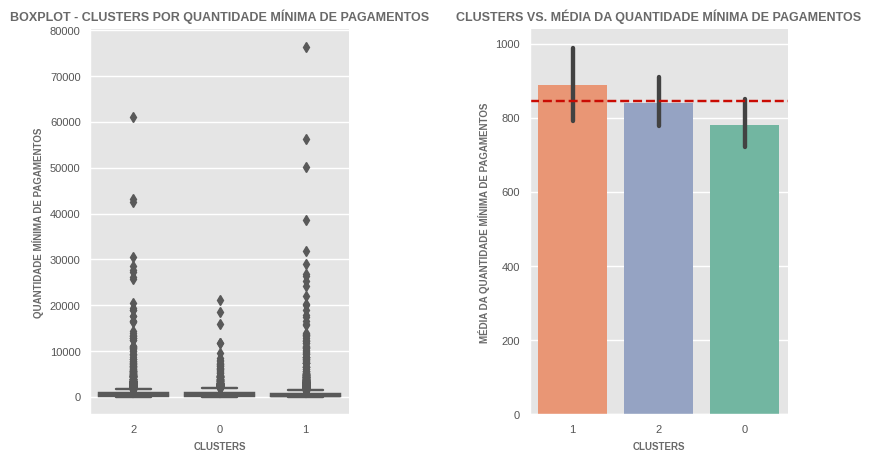

In [21]:
# Plot

plt.figure(figsize=(9,5))

plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8

plt.subplot(1, 2, 1)
cores = ['#8da0cb', '#66c2a5', '#fc8d62']
sns.set_palette(sns.color_palette(cores))
sns.boxplot(data=df, x='cluster', y='MINIMUM_PAYMENTS', order = df.groupby(['cluster'])['MINIMUM_PAYMENTS'].median().sort_values(ascending=False).index)
sns.despine()
plt.title('BOXPLOT - CLUSTERS POR QUANTIDADE MÍNIMA DE PAGAMENTOS', fontsize = 9, color ='dimgrey', fontweight = 'bold')
plt.xlabel('CLUSTERS', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 7)
plt.ylabel('QUANTIDADE MÍNIMA DE PAGAMENTOS', color = 'dimgrey', fontweight = 'bold', fontsize = 7)

plt.subplot(1, 2, 2)
cores = ['#fc8d62', '#8da0cb', '#66c2a5']
sns.set_palette(sns.color_palette(cores))
media = np.mean(df['MINIMUM_PAYMENTS'])
ax = sns.barplot(x = 'cluster', y = 'MINIMUM_PAYMENTS', data=df, order = df.groupby(['cluster'])['MINIMUM_PAYMENTS'].mean().sort_values(ascending=False).index)
sns.despine()
ax.axhline(media, color='r', linestyle='--')
plt.title('CLUSTERS VS. MÉDIA DA QUANTIDADE MÍNIMA DE PAGAMENTOS', fontsize = 9, color ='dimgrey', fontweight = 'bold')
plt.xlabel('CLUSTERS', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 7)
plt.ylabel('MÉDIA DA QUANTIDADE MÍNIMA DE PAGAMENTOS', color = 'dimgrey', fontweight = 'bold', fontsize = 7)

plt.subplots_adjust(wspace=0.7)
plt.show();

Cliente 0: Quantidade mínima de pagamentos feitos pelo usuário abaixo da média

Cliente 1: Maior quantidade mínima de pagamentos feitos pelo usuário

Cliente 2: Quantidade mínima de pagamentos feitos pelo usuário um pouco abaixo da média

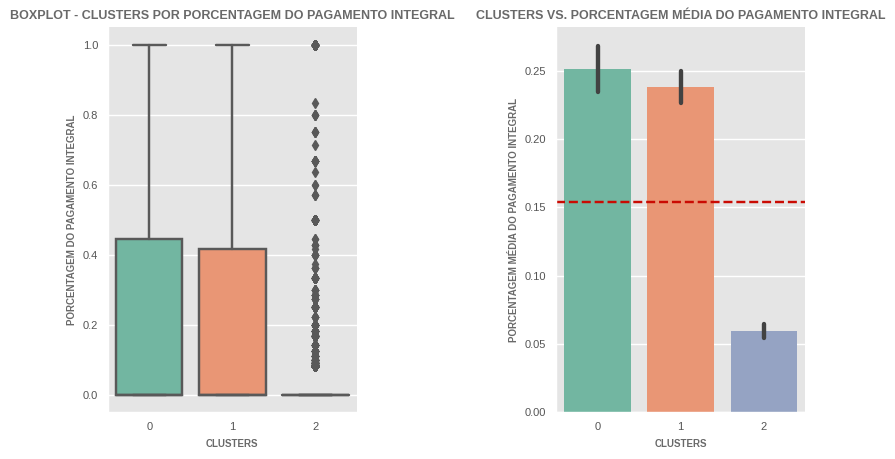

In [22]:
# Plot

plt.figure(figsize=(9,5))

plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8

plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='cluster', y='PRC_FULL_PAYMENT', palette = 'Set2', order = df.groupby(['cluster'])['PRC_FULL_PAYMENT'].median().sort_values(ascending=False).index)
sns.despine()
plt.title('BOXPLOT - CLUSTERS POR PORCENTAGEM DO PAGAMENTO INTEGRAL', fontsize = 9, color ='dimgrey', fontweight = 'bold')
plt.xlabel('CLUSTERS', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 7)
plt.ylabel('PORCENTAGEM DO PAGAMENTO INTEGRAL', color = 'dimgrey', fontweight = 'bold', fontsize = 7)

plt.subplot(1, 2, 2)
media = np.mean(df['PRC_FULL_PAYMENT'])
ax = sns.barplot(x = 'cluster', y = 'PRC_FULL_PAYMENT', data=df, palette = 'Set2', order = df.groupby(['cluster'])['PRC_FULL_PAYMENT'].mean().sort_values(ascending=False).index)
sns.despine()
ax.axhline(media, color='r', linestyle='--')
plt.title('CLUSTERS VS. PORCENTAGEM MÉDIA DO PAGAMENTO INTEGRAL', fontsize = 9, color ='dimgrey', fontweight = 'bold')
plt.xlabel('CLUSTERS', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 7)
plt.ylabel('PORCENTAGEM MÉDIA DO PAGAMENTO INTEGRAL', color = 'dimgrey', fontweight = 'bold', fontsize = 7)

plt.subplots_adjust(wspace=0.8)
plt.show();

Cliente 0: Maior porcentagem do pagamento integral pago pelo usuário

Cliente 1: Alta porcentagem do pagamento integral pago pelo usuário

Cliente 2: Porcentagem do pagamento integral pago pelo usuário muito baixa

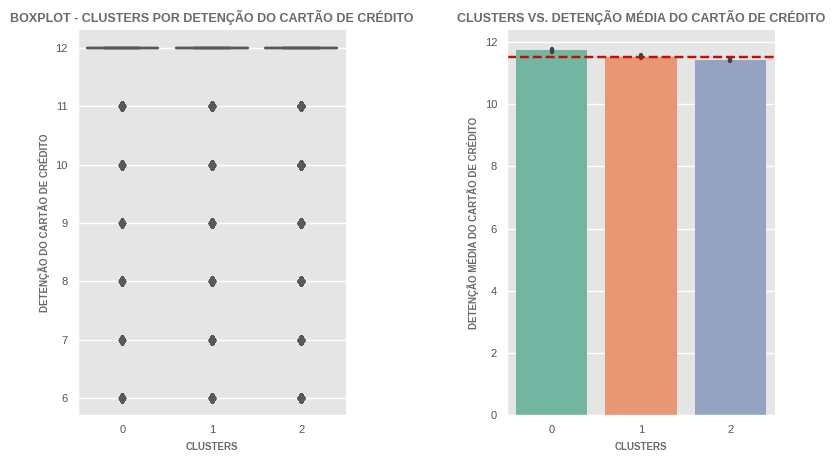

In [23]:
# Plot

plt.figure(figsize=(9,5))

plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8

plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='cluster', y='TENURE', palette = 'Set2', order = df.groupby(['cluster'])['TENURE'].median().sort_values(ascending=False).index)
sns.despine()
plt.title('BOXPLOT - CLUSTERS POR DETENÇÃO DO CARTÃO DE CRÉDITO', fontsize = 9, color ='dimgrey', fontweight = 'bold')
plt.xlabel('CLUSTERS', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 7)
plt.ylabel('DETENÇÃO DO CARTÃO DE CRÉDITO', color = 'dimgrey', fontweight = 'bold', fontsize = 7)

plt.subplot(1, 2, 2)
media = np.mean(df['TENURE'])
ax = sns.barplot(x = 'cluster', y = 'TENURE', data=df, palette = 'Set2', order = df.groupby(['cluster'])['TENURE'].mean().sort_values(ascending=False).index)
sns.despine()
ax.axhline(media, color='r', linestyle='--')
plt.title('CLUSTERS VS. DETENÇÃO MÉDIA DO CARTÃO DE CRÉDITO', fontsize = 9, color ='dimgrey', fontweight = 'bold')
plt.xlabel('CLUSTERS', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 7)
plt.ylabel('DETENÇÃO MÉDIA DO CARTÃO DE CRÉDITO', color = 'dimgrey', fontweight = 'bold', fontsize = 7)

plt.subplots_adjust(wspace=0.6)
plt.show();

Detenção do serviço de cartão de crédito para o usuário quase iguais todos os clientes.

Em síntese, por meio da interpretação dos gráficos podemos inferir que:

- **Cliente 0:** A principal característica que difere este grupo dos demais é que possuem um alto saldo com atualização frequente, maior limite de cartão de crédito, realizam uma quantidade de compras muito acima dos outros e com alta frequência, tanto em compras feitas de uma só vez como em compras parceladas e são os que mais fazem pagamento integral. 


- **Cliente 1:** O destaque desse grupo é que eles têm o menor limite de crédito e saldo entre todos, no entanto eles costumam manter seu saldo atualizado frequentemente, pois são o segundo grupo que mais faz compras e estas compras são frequentemente parceladas. Eles também são os que possuem a maior quantidade de pagamentos mínimos, mas também realizam o pagamento integral acima da média.


- **Cliente 2:** O que chama atenção neste grupo é que apesar de possuírem um saldo acima da média e o segundo maior em limite de crédito entre os grupos, são os que têm o saldo atualizado com a menor frequência, pois não realizam compras de maneira geral. Contudo, são os que mais utilizam dinheiro adiantado de forma disparada comparado com os demais e ainda realizam o pagamento de forma integral muito abaixo da média.
